# Linear Regression : Case Study


* Reading a Dataset for Linear Regression 
* Exploratory Data Analysis and Visualization
* Feature Engineering 
* Building Linear Regression Model
* Model Evaluation 
* Model Fine Tunning
* Final Results

## Loading Dataset for Linear Regression 

### Loading required libraries

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Reading the dataset ( make sure the data is in the current directory or also mention the directory path where data lies)

df=pd.read_csv('Linear_regression_dataset.csv')

In [4]:
# check the shape of the data
df.shape

(1232, 6)

The dataset set contains 1232 rows and 6 columns 

In [5]:
#view few rows of the dataset
df.head(3)

,var_1,var_2,var_3,var_4,var_5,output
0,734,688,81,0.328,0.259,0.418
1,700,600,94,0.320,0.247,0.389
2,712,705,93,0.311,0.247,0.417


In [6]:
# View more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 6 columns):
var_1     1232 non-null int64
var_2     1232 non-null int64
var_3     1232 non-null int64
var_4     1232 non-null float64
var_5     1232 non-null float64
output    1232 non-null float64
dtypes: float64(3), int64(3)
memory usage: 57.8 KB


The dataset does not contain any missing values and datatypes are int and floats 

In [7]:
df.describe()

,var_1,var_2,var_3,var_4,var_5,output
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,715.081981,715.081981,80.904221,0.326331,0.259273,0.397342
std,91.534294,93.079933,11.458139,0.015013,0.012907,0.033267
min,463.000000,472.000000,40.000000,0.277000,0.214000,0.301000
25%,652.000000,649.750000,73.000000,0.317000,0.251000,0.375000
50%,711.000000,709.000000,81.000000,0.326000,0.260000,0.396000
75%,775.000000,774.250000,89.000000,0.337000,0.268000,0.421000
max,1009.000000,1103.000000,116.000000,0.373000,0.294000,0.491000


## Exploratory Data Analysis 

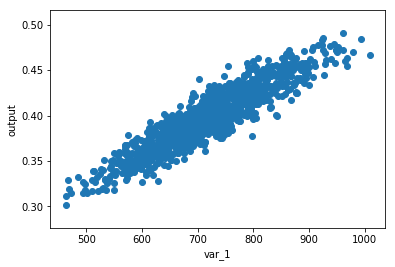

In [8]:
plt.scatter(df['var_1'],df['output'])
plt.xlabel('var_1')
plt.ylabel('output')
plt.show()

Strong relationship between var_1 and output

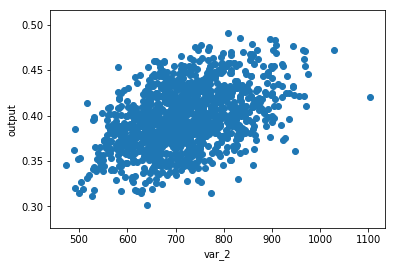

In [9]:
plt.scatter(df['var_2'],df['output'])
plt.xlabel('var_2')
plt.ylabel('output')
plt.show()

Relatively weak relationship between var_2 and output

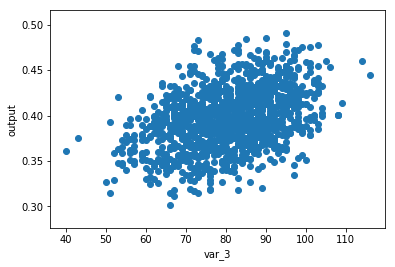

In [10]:
plt.scatter(df['var_3'],df['output'])
plt.xlabel('var_3')
plt.ylabel('output')
plt.show()

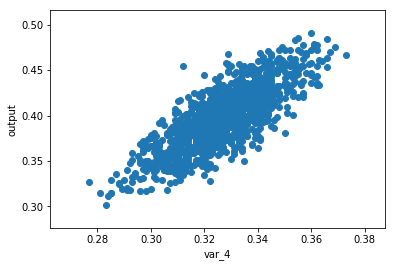

In [11]:
plt.scatter(df['var_4'],df['output'])
plt.xlabel('var_4')
plt.ylabel('output')
plt.show()

Strong relationship between var_4 and output

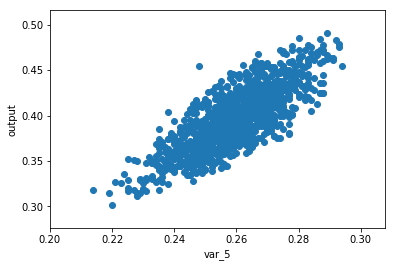

In [12]:
plt.scatter(df['var_5'],df['output'])
plt.xlabel('var_5')
plt.ylabel('output')
plt.show()

## Correlation plot to view relationship amongst input variables and output

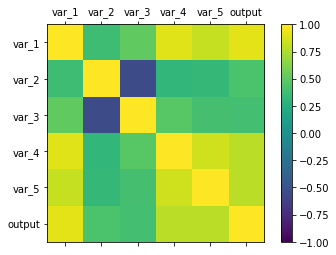

In [13]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax,)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

var_2 and var_3 are strongly negatively correlated ( issue of multi collinearity) 

## Feature Engineering

Creating the input variables and output/target variables 

* X = Input variables
* y = Target/output variables

In [14]:
#create X ( input variables with all columns except for outout/target column )
X=df.loc[:,df.columns !='output']

In [16]:
#so , input data has 1232 rows but only 5 columns 
X.shape

(1232, 5)

In [17]:
#X does not contain output column
X.head(3)

,var_1,var_2,var_3,var_4,var_5
0,734,688,81,0.328,0.259
1,700,600,94,0.320,0.247
2,712,705,93,0.311,0.247


In [18]:
#create the y data with only output column
y=df['output']

In [19]:
y.shape

(1232,)

In [20]:
y.head(3)

0    0.418
1    0.389
2    0.417
Name: output, dtype: float64

### Split intro train and test set for model buulding and validation purpose 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
#create training and test samples with 70/30 split ration between train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [23]:
#we train our LR model on 862 rows and test on 370 remaining records
X_train.shape

(862, 5)

In [24]:
X_test.shape

(370, 5)

In [25]:
y_train.shape

(862,)

In [26]:
y_test.shape

(370,)

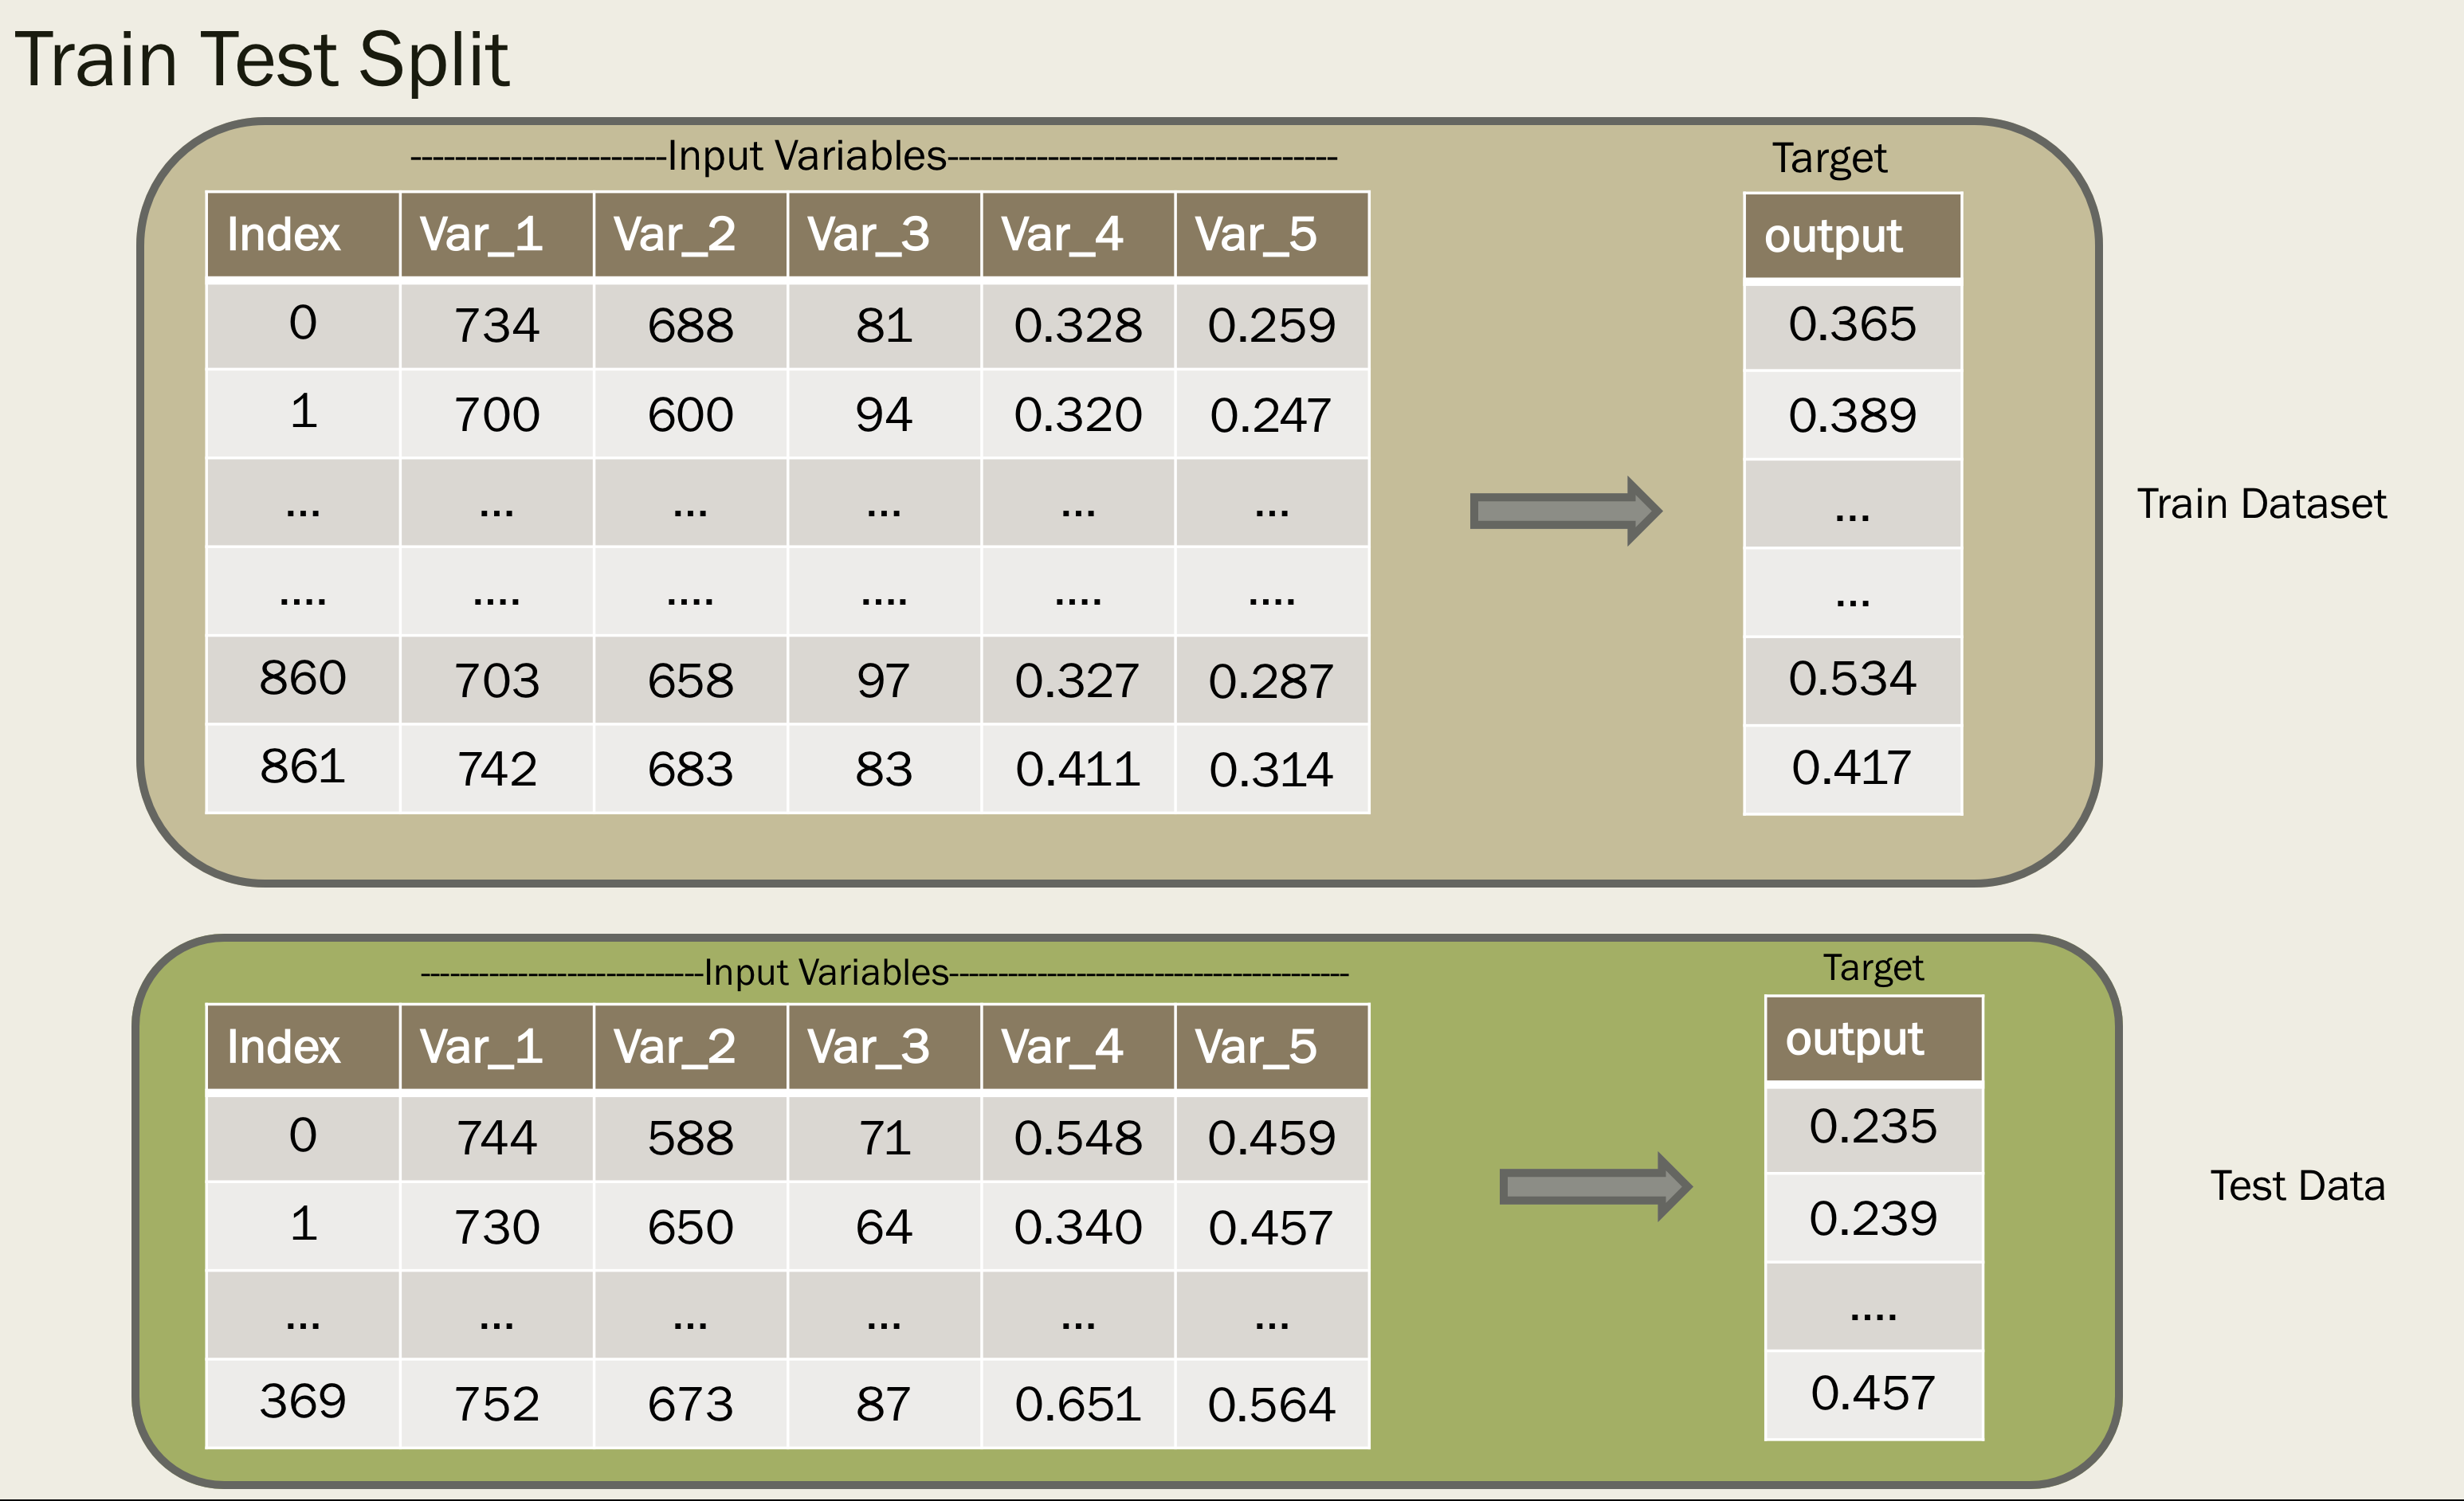

In [27]:
from IPython.display import Image
Image(filename='train_test.png')

## Build Linear Regression Model

In [28]:
#Train the Linear Regression model on training dataset
lr = LinearRegression().fit(X_train, y_train)

In [30]:
#the coefficients value for the input variables ( B1,B2,B3,B4,B5)
lr.coef_

array([  3.26446605e-04,   5.61876540e-05,   2.13640209e-04,
        -6.03043663e-01,   4.91331050e-01])

In [31]:
#The intercept value B0( the value of output when all input variables are zero )
lr.intercept_

0.17610200020840108

In [50]:
#The hyper paramters that were used to build Linear regression model ( more on this later)
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

## Model Evaluation 

In [36]:
#print the results of the model on train dataset
print(" The accuracy of model on training dataset is {:.4f} ".format(lr.score(X_train,y_train)))

 The accuracy of model on training dataset is 0.8688 


In [35]:
#print the result of the model on test dataset
print(" The accuracy of model on test dataset is {:.4f} ".format(lr.score(X_test,y_test)))

 The accuracy of model on test dataset is 0.8693 


## Model fine Tunning

In [72]:
#create a model that accepts number of features to be used to build the model
def lr_model(num_features):
    #for all the features starting from 1 
    df=pd.read_csv('Linear_regression_dataset.csv')
    for i in range(1,num_features+1):
        #create input dataset with adding number of columns each time
        X=df.iloc[:,0:i]
        #keeping the output column same everytime
        y=df['output']
        #splitting the dataset into train test
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
        #building and training LR model 
        lr = LinearRegression().fit(X_train, y_train)
        #printing results
        print(" The accuracy of model on training dataset for {} is {:.5f} ".format(i,lr.score(X_train,y_train)))
        print(" The accuracy of model on test dataset for {} is {:.5f} ".format(i,lr.score(X_test,y_test)))
        

        

In [73]:
lr_model(num_features=5)

 The accuracy of model on training dataset for 1 is 0.84424 
 The accuracy of model on test dataset for 1 is 0.84256 
 The accuracy of model on training dataset for 2 is 0.85377 
 The accuracy of model on test dataset for 2 is 0.85013 
 The accuracy of model on training dataset for 3 is 0.85413 
 The accuracy of model on test dataset for 3 is 0.85013 
 The accuracy of model on training dataset for 4 is 0.85950 
 The accuracy of model on test dataset for 4 is 0.85933 
 The accuracy of model on training dataset for 5 is 0.86882 
 The accuracy of model on test dataset for 5 is 0.86931 


### We can consider using only 4 variables to keep the model performing and generalising well.